In [1]:
DATE_LOC = r'..\data\raw\survey_results_public.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

In [4]:
# Load the data
raw_df = pd.read_csv(DATE_LOC)

In [5]:
raw_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Stack Exchange network,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Blogs;Books;Written Tutorials;Stack Overflow,API document(s) and/or SDK document(s);User guides or README files found in the source repository;First-party knowledge base;Traditional public search engine,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern Ireland,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Kotlin;Python;TypeScript,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private know

In [6]:
raw_df.shape

(65437, 114)

In [10]:
raw_df.sample().iloc[0]

ResponseId                                                                                                                                                                                          12170
MainBranch                                                                                                          I am not primarily a developer, but I write code sometimes as part of my work/studies
Age                                                                                                                                                                                       25-34 years old
Employment                                                                                                                                                             Not employed, but looking for work
RemoteWork                                                                                                                                                                                      

In [19]:
print('Total num of rows: ', raw_df.shape[0])
total_appels = sum(raw_df['Check']=='Apples')
print(f"Apples size is {total_appels}")
print(f"Apples percentage is {total_appels/raw_df.shape[0]*100:.2f}%")

Total num of rows:  65437
Apples size is 65437
Apples percentage is 100.00%


In [12]:
raw_df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [22]:
# Get columns with numeric dtypes
numeric_cols = raw_df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:")
for col in numeric_cols:
    print(f"{col}: {raw_df[col].dtype}")

Numeric columns:
ResponseId: int64
CompTotal: float64
WorkExp: float64
JobSatPoints_1: float64
JobSatPoints_4: float64
JobSatPoints_5: float64
JobSatPoints_6: float64
JobSatPoints_7: float64
JobSatPoints_8: float64
JobSatPoints_9: float64
JobSatPoints_10: float64
JobSatPoints_11: float64
ConvertedCompYearly: float64
JobSat: float64


In [16]:
numeric_columns = ['YearsCode', 'YearsCodePro']

In [17]:
for column in numeric_columns:
    print(f"Unique values in {column} are: {raw_df[column].unique().tolist()}")
    print("----------")

Unique values in YearsCode are: [nan, '20', '37', '4', '9', '10', '7', '1', '15', '30', '31', '6', '12', '22', '5', '36', '25', '44', '24', '18', '3', '8', 'More than 50 years', '11', '29', '40', '39', '2', '42', '34', '19', '35', '16', '33', '13', '23', '14', '28', '17', '21', '43', '46', '26', '32', '41', '45', '27', '38', '50', '48', '47', 'Less than 1 year', '49']
----------
Unique values in YearsCodePro are: [nan, '17', '27', '7', '11', '25', '12', '10', '3', 'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8', '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13', '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50', '39', '44', '42', '41', '36', '38', 'More than 50 years', '43', '47', '48', '46', '49']
----------


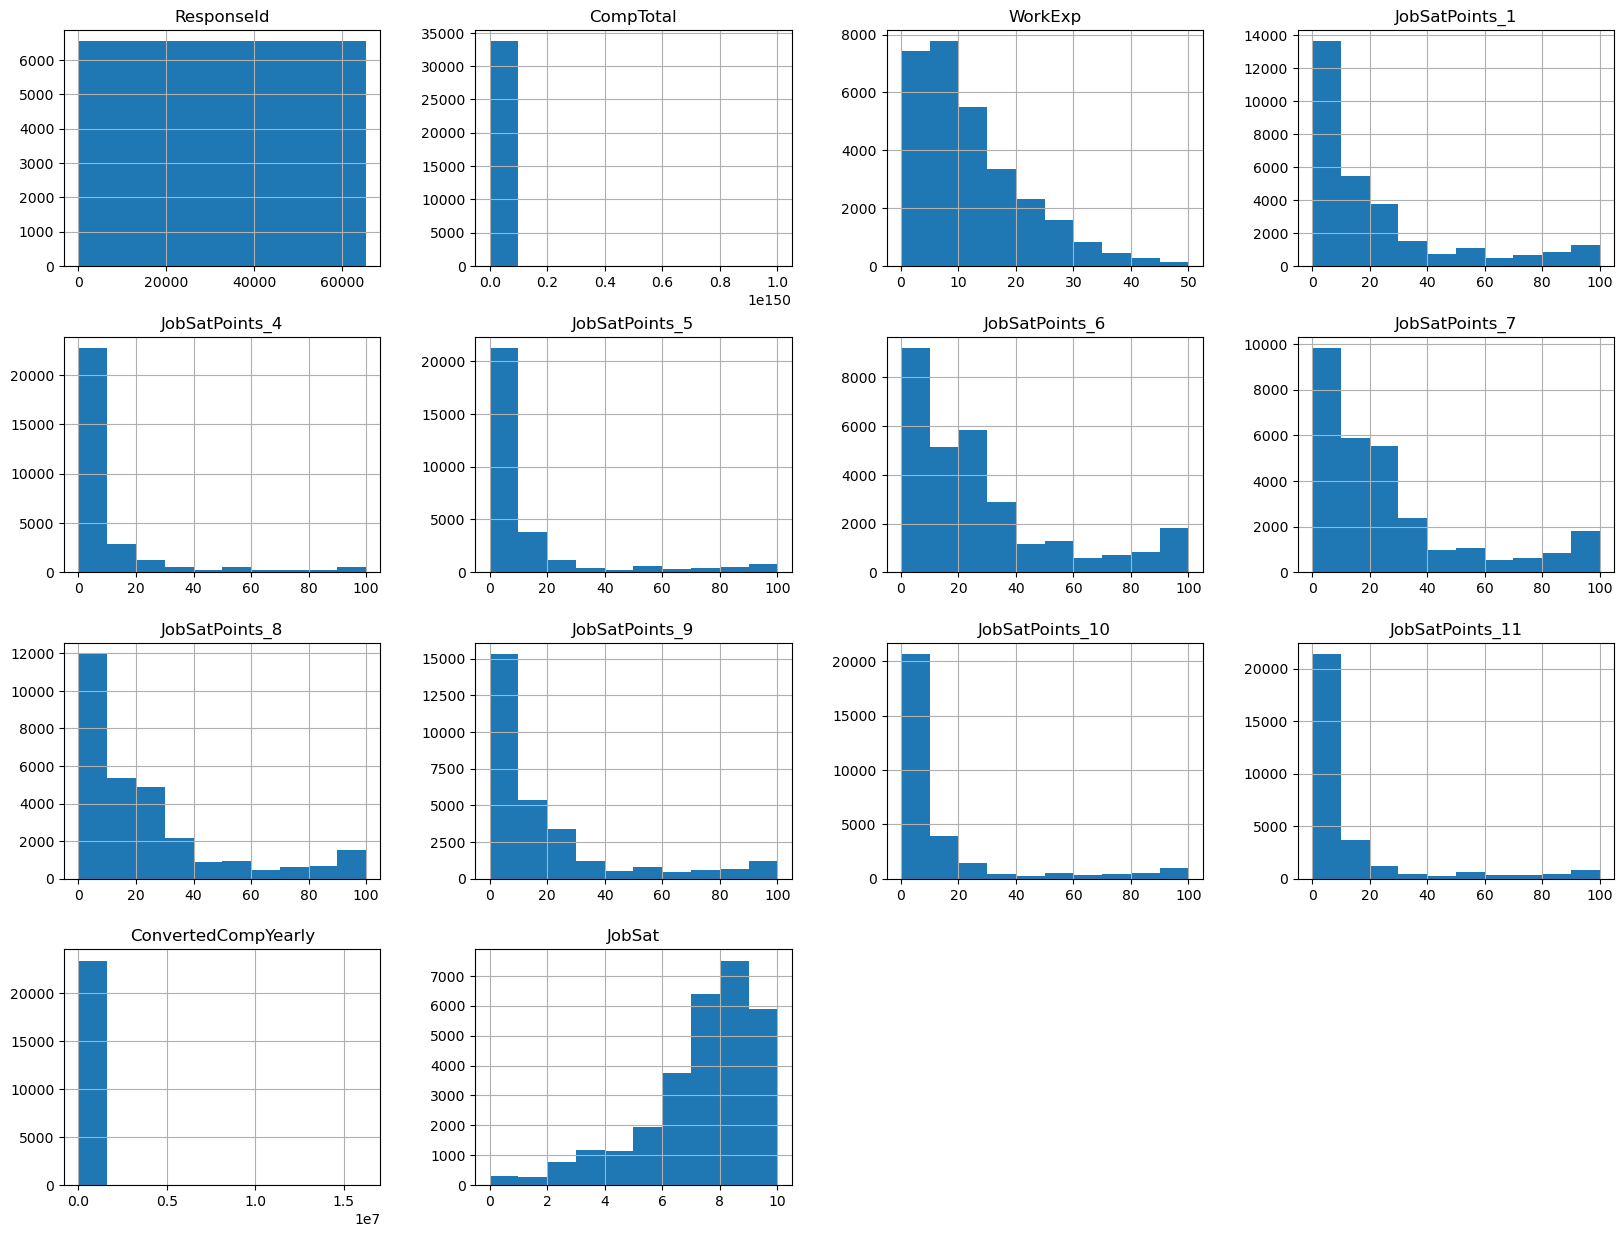

In [24]:
raw_df.hist(bins=10, figsize=(20, 15))
plt.show()